In [1]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec



from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

custom_colors = ['#153243', '#284b63',
                 '#4d7ea8', #'#90a9c7',
                 #'#a1b4cf',
                 '#b6c2d9',
                '#ffffff', '#f5f5f5', #'#DFE2DF', '#E5D7B6',
                  '#EBCC8C', '#F7B538',
                 '#DB7C26', '#D8572A','#780116']#, '#242325']

pmap = LinearSegmentedColormap.from_list('', custom_colors)
pmap.reversed();

In [2]:
data2 = np.genfromtxt('dark_comet_data.csv',delimiter=',',dtype=str,usecols=np.arange(0,21))#,skip_header=14)


In [3]:
numobjects = 14
A2 = np.zeros(numobjects)
A1 = np.zeros(numobjects)
A3 = np.zeros(numobjects)
mag = np.zeros(numobjects)
TJ=np.zeros(numobjects)

a_DC= np.zeros(numobjects)
e_DC=np.zeros(numobjects)

cnt=0
for i in np.arange(2,len(data2)):

    try:
        if (np.abs(float(data2[i][17])) >2.5):
            A2[cnt]= float(data2[i][15])
    except:
        pass
    try:
        if (np.abs(float(data2[i][14])) >2.5):
            A1[cnt]= float(data2[i][12])
    except:
        pass
    try:
        if (np.abs(float(data2[i][20])) >2.5):
            A3[cnt]= float(data2[i][18])
    except:
        pass
    try:
        mag[cnt]=float(data2[i][7])
    except:
        pass
    try:
        TJ[cnt]=float(data2[i][6])
    except:
        pass
    try:
        a_DC[cnt]=float(data2[i][2])
    except:
        pass
    try:
        e_DC[cnt]=float(data2[i][3])
    except:
        pass
    cnt+=1

In [4]:
def get_tj(ap,ep,ip):
    a_Jupiter =5.20336301 #au (astronomical units)
    Tjp= a_Jupiter/ap + 2.*np.sqrt((1.-ep*ep)*ap/a_Jupiter)*np.cos(np.radians(ip))
    return Tjp

In [5]:
data_NEC = np.genfromtxt('near_earth_comets.csv',delimiter=',',dtype=str)#,skip_header=14)
name_NEC = []
a_NEC = []
e_NEC = []
radius_nucleus=[]
i_NEC=[]
A1_NEC=[]
A2_NEC=[]
A3_NEC=[]
for i in np.arange(1,len(data_NEC)):
    #print(i)
    #print(data_NEC[i][0])
    name_NEC.append(data_NEC[i][0])
    a_NEC.append(float(data_NEC[i][1]))
    e_NEC.append(float(data_NEC[i][2]))
    i_NEC.append(float(data_NEC[i][3]))
    if (data_NEC[i][18]==''):
        A1_NEC.append(0)
    else:
        A1_NEC.append(float(data_NEC[i][18]))
    
    if (data_NEC[i][19]==''):
        A2_NEC.append(0)
    else:
        A2_NEC.append(float(data_NEC[i][19]))
    if (data_NEC[i][20]==''):
        A3_NEC.append(0)
    else:
        #A2_NEC.append(float(data[i][19]))
        A3_NEC.append(float(data_NEC[i][20]))

a_NEC=np.array(a_NEC)
e_NEC=np.array(e_NEC)
i_NEC=np.array(i_NEC)
A1_NEC=np.array(A1_NEC)
A2_NEC=np.array(A2_NEC)
A3_NEC=np.array(A3_NEC)
TjNEC=get_tj(a_NEC,e_NEC,i_NEC)

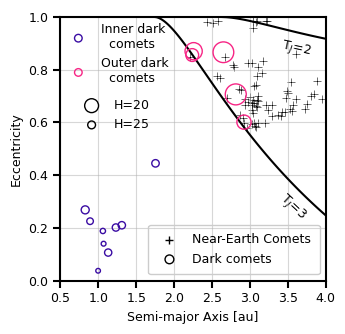

In [39]:
extent = (0, 6, 0., 1)

x = np.linspace(0.001, 9, 1000)
y = np.linspace(0.001, 1, 1000)
X, Y = np.meshgrid(x, y)

Z = get_tj(X,Y,0)

cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(1, 1, tight_layout=False,figsize=(8.7*cm,8.7*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.35, 'wspace': 0.3})
levels = [2,3]#,10]#np.linspace(Z.min(), Z.max(), 10)

axs.contour(X, Y, Z, levels=levels,colors='k')
axs.grid(alpha=0.5)

axs.set_xlim(0.5,4)
axs.set_ylim(0,1)

axs.set_ylabel(r'Eccentricity')
axs.set_xlabel(r'Semi-major Axis [au]')
axs.annotate(r'T$_J$=3',(3.34,0.24),rotation=-43)

axs.annotate(r'T$_J$=2',(3.4,0.86),rotation=-12)
linewidth=1.
im4 = axs.scatter(a_NEC,
                  e_NEC,
                  marker='+',
                  #cmap='Purples',vmin=0.1,vmax=90,
                  #norm=LogNorm(),
                  color='k',lw=linewidth/2.5,s=30,label='Near-Earth Comets')
im1 = axs.scatter(a_DC[(TJ<3.1) & (TJ>1)],e_DC[(TJ<3.1) & (TJ>1)],marker='o',
                  color='none',edgecolor='#f72585',lw=linewidth,
                  s=1e4*10**(-0.1*mag[(TJ<3.1) & (TJ>1)]),label='Outer dark comets',zorder=10)

im2 = axs.scatter(a_DC[(TJ>3.1)],e_DC[(TJ>3.1)],marker='o',
                  color='none',edgecolor='#3a0ca3',lw=linewidth,
                  s=1e4*10**(-0.1*mag[(TJ>3.1)]),label='Inner dark comets',zorder=10)
im6 = axs.scatter(100,
                  100,
                  marker='+',
                  color='k',lw=linewidth,s=30,label='Near-Earth Comets')
im7 = axs.scatter(100,
                  100,
                  marker='o',
                  color='none',edgecolor='k',lw=linewidth,s=40,label='Dark comets')

im8 = axs.scatter(100,100,marker='o',
                  color='none',edgecolor='#3a0ca3',lw=linewidth,
                  s=30,label='Inner dark \n  comets')

im9 = axs.scatter(100,100,marker='o',
                  color='none',edgecolor='#f72585',lw=linewidth,
                  s=30,label='Outer dark \n  comets')

im11 = axs.scatter(100,
                  100,
                  marker='o',
                  color='none',edgecolor='k',lw=linewidth,s=1e4*10**(-0.1*16),label='H=16')
im12 = axs.scatter(100,
                  100,
                  marker='o',
                  color='none',edgecolor='k',lw=linewidth,s=1e4*10**(-0.1*20),label='H=20')
im13 = axs.scatter(100,
                  100,
                  marker='o',
                  color='none',edgecolor='k',lw=linewidth,s=1e4*10**(-0.1*25),label='H=25')

l1=axs.legend(handles=[im6,im7],fancybox=True, framealpha=1, 
           shadow=False, borderpad=0.7,#bbox_to_anchor=(.85,.01356),
           frameon=True, loc='lower right', ncol=1)#,prop={'size': 12},facecolor='none')



l2=axs.legend(handles=[im8,im9],fancybox=True, framealpha=1, 
           shadow=False, borderpad=1,bbox_to_anchor=(-.050,1.05),
           frameon=False, loc='upper left', ncol=1)#,prop={'size': 12},facecolor='none')

l3=axs.legend(handles=[im12,im13],fancybox=True, framealpha=1, 
           shadow=False, borderpad=1,bbox_to_anchor=(0.0,.76),
           frameon=False, loc='upper left', ncol=1)#,prop={'size': 12},facecolor='none')

axs.add_artist(l2)
axs.add_artist(l1)

plt.savefig('Dark_Comets_Tisserand_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)

